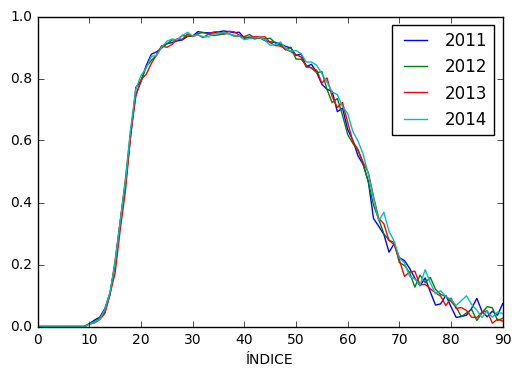

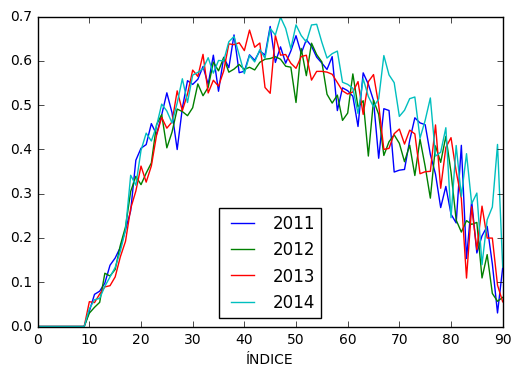

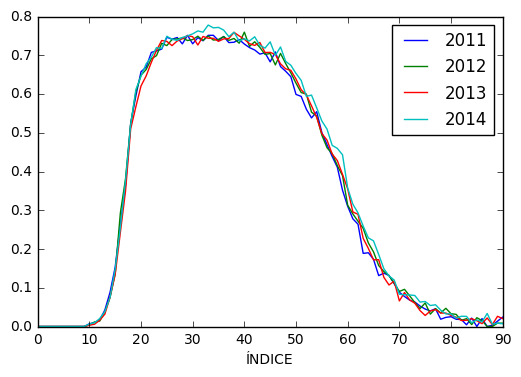

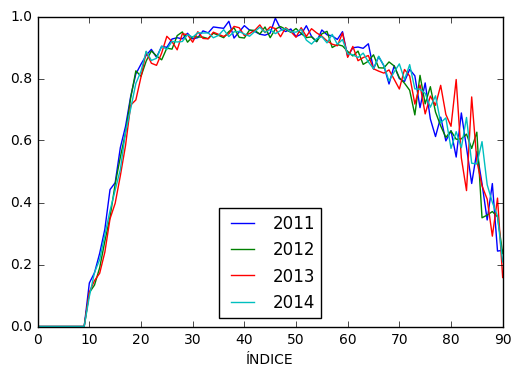

In [5]:
import pandas as pd
%matplotlib inline
import sys
sys.path.append('../')

from util.carrega_dados import get_tabelas

# Arquivo com os dados da Fazenda
arquivo = '../../datasets/FAZENDA/dados_fazenda.xlsx'
tags_populacao_pnad = ['PopPnadH','PopPnadM', 'PopUrbPnadH','PopUrbPnadM',
                       'PopRurPnadH','PopRurPnadM',
                       'PeaUrbPnadH','PeaUrbPnadM', 'PeaRurPnadH','PeaRurPnadM'] 
ano=2013

# Abri o arquivo
dados = pd.ExcelFile(arquivo)
pop_pnad = get_tabelas(tags_populacao_pnad, dados)  

txurb = {}
tx_crescimento_urb = 0.5

for sexo in ['H','M']:
    chave = 'txUrb'+sexo         
    txurb[chave] = pop_pnad['PopUrbPnad'+sexo]/pop_pnad['PopPnad'+sexo]
    
# Crescimento a partir de 2015
for taxa in txurb:
    for ano in range(2015,2061):
        txurb[taxa][ano] = txurb[taxa][ano-1] * (1 + tx_crescimento_urb ) 


txpart = {}
tx_crescimento_part = 0 # REVISAR
limite_crescimento = 0 # REVISAR
    
for clientela in ['Urb', 'Rur']:
    for sexo in ['H','M']:
        chave = 'txPart'+clientela+sexo         
        pea = pop_pnad['Pea'+clientela+'Pnad'+sexo]
        pia = pop_pnad['Pop'+clientela+'Pnad'+sexo]
        txpart[chave] = pea/pia

for tx in txpart:
    txpart[tx].plot()
    

In [39]:
for pop in populacao_pnad:
    print(pop.replace('Pnad', 'Urb'))


PopUrbH
PopUrbM
PopUrbUrbM
PopUrbUrbH
